# Loan Application Status Prediction

**Project Description:**
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

Dataset Link-  
•	 https://github.com/dsrscientist/DSData/blob/master/loan_prediction.csv 


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Load the dataset
df = pd.read_csv("C://Users//rahul//OneDrive//Attachments//Desktop//data trained//internship//Evaluation project//phase 2//Loan Application Status Prediction-Eval proj-3//loan_prediction.csv")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [15]:
df.describe()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

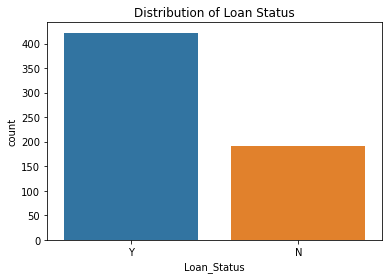

In [17]:
plt.figure(figsize=(6,4))
sns.countplot(x='Loan_Status', data=df)
plt.title('Distribution of Loan Status')
plt.show()

In [19]:
# Impute LoanAmount with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

# Impute Credit_History with mode
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

df.fillna(method='ffill', inplace=True)

# Verify no missing values remain
print("Missing Values After Handling:")
df.isnull().sum()


Missing Values After Handling:


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [20]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']


In [21]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [22]:
# Initialize LabelEncoder
le = LabelEncoder()

# Encode binary categorical variables
binary_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# Handle 'Dependents' - replace '3+' with 3 and convert to numeric
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

# One-Hot Encode 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True)

# Encode target variable 'Loan_Status'
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

# Display the first few rows after encoding
print("Data After Encoding:")
df.head()

Data After Encoding:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,1,0,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,1,0,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,1,0,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,1,0,1


In [23]:
# Identify numerical columns
numerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the first few rows after scaling
print("Data After Scaling:")
df.head()


Data After Scaling:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1,0,-0.752177,0,0,0.072991,-0.554487,-0.211241,0.280037,0.411733,1,0,1
1,LP001003,1,1,0.236767,0,0,-0.134412,-0.038732,-0.211241,0.280037,0.411733,0,0,0
2,LP001005,1,1,-0.752177,0,1,-0.393747,-0.554487,-0.948996,0.280037,0.411733,1,0,1
3,LP001006,1,1,-0.752177,1,0,-0.462062,0.251980,-0.306435,0.280037,0.411733,1,0,1
4,LP001008,1,0,-0.752177,0,0,0.097728,-0.554487,-0.056551,0.280037,0.411733,1,0,1


In [24]:
# Define features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

print("\nFeatures and Target:")
print("X shape:", X.shape)
print("y shape:", y.shape)



Features and Target:
X shape: (614, 12)
y shape: (614,)


In [27]:
# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

In [28]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (491, 12)
Testing Set Shape: (123, 12)


In [29]:
# Initialize Logistic Regression
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123



In [30]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123



In [31]:
# Initialize Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Train the model
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)

# Evaluate
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, y_pred_gb))


Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.55      0.65        38
           1       0.82      0.93      0.87        85

    accuracy                           0.81       123
   macro avg       0.80      0.74      0.76       123
weighted avg       0.81      0.81      0.80       123



In [32]:
# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Train the model
xgb_clf.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_clf.predict(X_test)

# Evaluate
print("XGBoost Classifier Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.66      0.68        38
           1       0.85      0.87      0.86        85

    accuracy                           0.80       123
   macro avg       0.77      0.76      0.77       123
weighted avg       0.80      0.80      0.80       123



In [33]:
# Function to calculate and print evaluation metrics
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_true, y_pred))
    print("-" * 60)

# Evaluate all models
evaluate_model(y_test, y_pred_lr, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Classifier")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting Classifier")
evaluate_model(y_test, y_pred_xgb, "XGBoost Classifier")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72        38
           1       0.84      0.99      0.91        85

    accuracy                           0.86       123
   macro avg       0.90      0.78      0.81       123
weighted avg       0.88      0.86      0.85       123

------------------------------------------------------------
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71        38
           1       0.85      0.93      0.89        85

    accuracy                           0.84       123
   macro avg       0.82      0.78      0.80       123
weighted avg       0.83      0.84      0.83       123

------------------------------------------------------------
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.78   

In [34]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, 
                       cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_rf.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

# Best Estimator
best_rf = grid_rf.best_estimator_

# Predict with best estimator
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
print("\nRandom Forest Classifier after Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_best_rf))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}

Random Forest Classifier after Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.55      0.69        38
           1       0.83      0.98      0.90        85

    accuracy                           0.85       123
   macro avg       0.87      0.76      0.79       123
weighted avg       0.86      0.85      0.83       123



In [35]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), 
                        param_grid_xgb, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV
grid_xgb.fit(X_train, y_train)

# Best Parameters
print("Best Parameters for XGBoost:", grid_xgb.best_params_)

# Best Estimator
best_xgb = grid_xgb.best_estimator_

# Predict with best estimator
y_pred_best_xgb = best_xgb.predict(X_test)

# Evaluate
print("\nXGBoost Classifier after Hyperparameter Tuning Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}

XGBoost Classifier after Hyperparameter Tuning Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        38
           1       0.84      0.96      0.90        85

    accuracy                           0.85       123
   macro avg       0.86      0.77      0.80       123
weighted avg       0.85      0.85      0.84       123



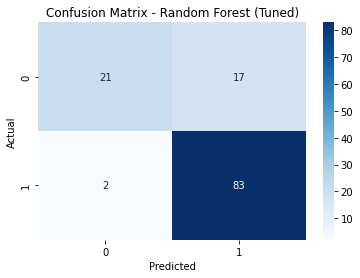

In [36]:
# Confusion Matrix for Tuned Random Forest
cm_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


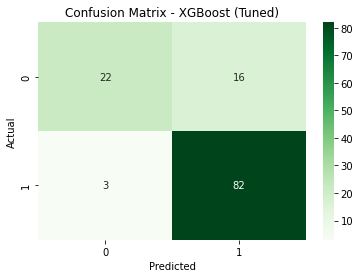

In [37]:
# Confusion Matrix for Tuned XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_best_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - XGBoost (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


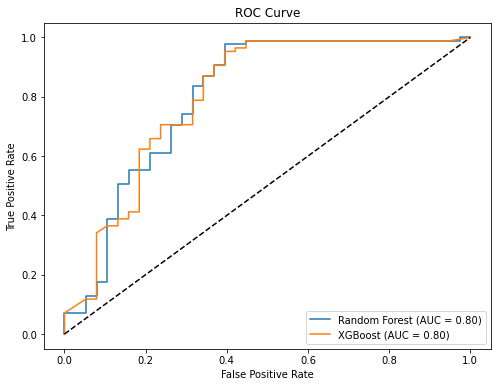

In [38]:
# ROC Curve for Random Forest
y_pred_proba_rf = best_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# ROC Curve for XGBoost
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)

# Plot ROC Curves
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


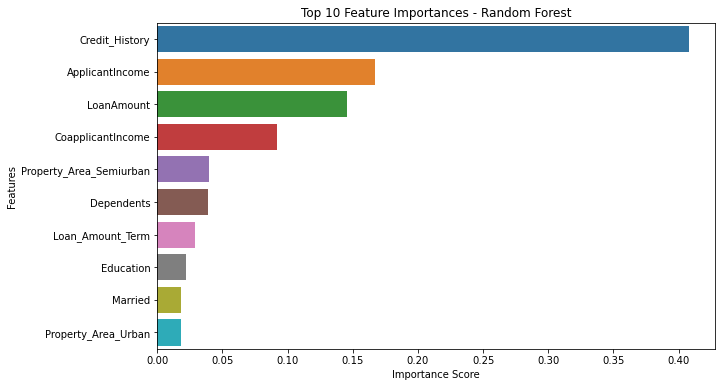

In [39]:
# Feature Importance for Random Forest
importances_rf = best_rf.feature_importances_
features_rf = X.columns
feature_importances_rf = pd.Series(importances_rf, index=features_rf).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_rf[:10], y=feature_importances_rf.index[:10])
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


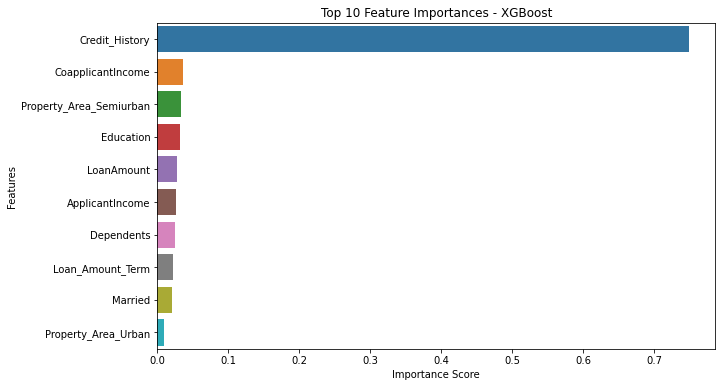

In [40]:
# Feature Importance for XGBoost
importances_xgb = best_xgb.feature_importances_
features_xgb = X.columns
feature_importances_xgb = pd.Series(importances_xgb, index=features_xgb).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances_xgb[:10], y=feature_importances_xgb.index[:10])
plt.title('Top 10 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()